In [2]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from matplotlib import animation 
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show
import psycopg2



In [3]:
def extractWordCounInContrib( groupData ):
    group = groupData 
    group1_1 = pd.DataFrame(group['message'])
    group1M_List=group1_1['message'].tolist()

    wordCount = []
    for x in group1M_List:
        if (pd.isnull(x )):
            text=0
        else:
            x = str(x)
            text = len(x.split())
        
        wordCount.append(text) 

   
    group["Word Count"]= wordCount 

    return group



In [4]:
def getDataFromDatabase(groupName):
    conn = psycopg2.connect(database="dcr579jl1mh56g", user = "tcuceyhvgqlejy", password = "2c8288a367bdc38450e89d9fc17b8f1319fac07c140f6bbb5f5339ee7ff984d5", host = "ec2-54-83-22-244.compute-1.amazonaws.com", port = "5432")

    #print "Opened database successfully"

    cur = conn.cursor()

    cur.execute("SELECT * from "+groupName)
    df = pd.DataFrame(cur.fetchall())
    df.columns = ['id', 'message', 'time', 'username']
    #df.columns = cur.keys()
    #rows = cur.fetchall()
    #print "Operation done successfully";
    conn.close()
    
    df2 = extractWordCounInContrib(df)
    return df2


In [5]:
group1_1 = getDataFromDatabase("s4group3")
group2_1 = getDataFromDatabase("s4group4")
group3_1 = getDataFromDatabase("s4group5")
group4_1 = getDataFromDatabase("s4group6")
group5_1 = getDataFromDatabase("s4group7")
group6_1 = getDataFromDatabase("s4group8")
group7_1 = getDataFromDatabase("s4group9")
group8_1 = getDataFromDatabase("s4group10")
group9_1 = getDataFromDatabase("s4group12")
group10_1 = getDataFromDatabase("s4group15")


In [6]:
def getGiniCoef(group, memList):
    #for a group of 4 members
    #We capture contribution of each of the members
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
        
    wordCount = medianWordCount(group, memList)

    contM1 =g_m1.shape[0]
    contM2 =g_m2.shape[0]
    contM3 =g_m3.shape[0]
    contM4 =g_m4.shape[0]
    
    
    grpWC= [contM1, contM2, contM3, contM4]
    
    #Mean of members contrubtion
    grpMean = np.mean(grpWC)
    summ=0
    #Caclute gini coeficient measure of symmetry of contributions within group
    for i in grpWC:
        n=grpWC.index(i)+1    
        for j in grpWC[n:]:
            summ+=abs(i-j)
            
    GiniCoefMeasure = summ/(2*(len(grpWC)**2)*grpMean)
    
    #As gini-coefficient measure range from 1-0 with 0 as perfect symmetry and 1 and total
    #assymetry. And our model hypothesize that the more symmetrical the better collaboration
    #within group. Therefore giniCoefficient measure is inversely proportional to level of
    #collaboration. Here we use the total number of wordcount divided by number of individuals
    #in the group as a constant of proportionality, as this stands in proxy for a mesure of 
    #how much information is shared within group.
    
    colabMeasure = wordCount/GiniCoefMeasure
    
    return  colabMeasure


In [7]:
def medianWordCount(group, memList):
    
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
        
    g_m1WC = g_m1['Word Count'].tolist()
    g_m2WC = g_m2['Word Count'].tolist()
    g_m3WC = g_m3['Word Count'].tolist()
    g_m4WC = g_m4['Word Count'].tolist()
    
    m1WC = sum(g_m1WC)
    m2WC = sum(g_m2WC)
    m3WC = sum(g_m3WC)
    m4WC = sum(g_m4WC)
    
    grpMWC= [m1WC,m2WC, m3WC, m4WC]
    
    
    return  median(grpMWC)


In [8]:
def withinGroupIndivCon(g, mList):
    g_m1=g.loc[g['username'] == mList[0]]
    g_m2=g.loc[g['username'] == mList[1]]
    g_m3=g.loc[g['username'] == mList[2]]
    g_m4=g.loc[g['username'] == mList[3]]
    
    
    m1WC = g_m1['Word Count'].tolist()
    m2WC = g_m2['Word Count'].tolist()
    m3WC = g_m3['Word Count'].tolist()
    m4WC = g_m4['Word Count'].tolist()
    
    
    #   m5WC = g_m4['Word Count'].tolist()
    
    #gWC = g['Word Count'].tolist()
    m1WCT = sum(m1WC)
    m2WCT = sum(m2WC)
    m3WCT = sum(m3WC)
    m4WCT = sum(m4WC)
    

    #m1WCT = np.log(1+m1WCT)
    #m2WCT = np.log(1+m2WCT)
    #m3WCT = np.log(1+m3WCT)
    #m4WCT = np.log(1+m4WCT)
    
    contM1 =g_m1.shape[0]
    contM2 =g_m2.shape[0]
    contM3 =g_m3.shape[0]
    contM4 =g_m4.shape[0]
    
    
    contM1 = (contM1*m1WCT)
    contM2 = (contM2*m2WCT)
    contM3 = (contM3*m3WCT)
    contM4 = (contM4*m4WCT)
    
    
    contDist=[contM1, contM2, contM3, contM4]
    
    return contDist


In [9]:
def selectFromGroup(gr, num):
    grpO = gr
    grpDataL=gr.shape[0]  #get the number of rows in group data
    
    if num<grpDataL:  #check if 'num' is not more that the number of rows in groupData
        grp=gr.iloc[0:num] # get first 'num' rows of dataframe
        
        return grp
    else:
        return grpO

In [10]:
def plotGroupAtTimeIntevals(grList,allGpMem, num):
    #Capture row lenght of data of each group into list
    l = [grList[0].shape[0], grList[1].shape[0], grList[2].shape[0], grList[3].shape[0],grList[4].shape[0], grList[5].shape[0], grList[6].shape[0], grList[7].shape[0], grList[8].shape[0], grList[9].shape[0]]
    grp1=[]
    grp2=[]
    grp3=[]
    grp4=[]
    grp5=[]
    grp6=[]
    grp7=[]
    grp8=[]
    grp9=[]
    grp10=[]
    
    timeSeries =[]
    timeT=0
    #Get the row lenght of group with maximum row
    maxL = max(l)
    for i in xrange(num ,maxL, num):
        ColabMeasure = getGiniCoef(selectFromGroup(grList[0], i), allGpMem[0]) 
        ColabMeasure2= getGiniCoef(selectFromGroup(grList[1], i), allGpMem[1])
        ColabMeasure3= getGiniCoef(selectFromGroup(grList[2], i), allGpMem[2])
        ColabMeasure4= getGiniCoef(selectFromGroup(grList[3], i), allGpMem[3])
        ColabMeasure5= getGiniCoef(selectFromGroup(grList[4], i), allGpMem[4]) 
        ColabMeasure6= getGiniCoef(selectFromGroup(grList[5], i), allGpMem[5])
        ColabMeasure7= getGiniCoef(selectFromGroup(grList[6], i), allGpMem[6])
        ColabMeasure8= getGiniCoef(selectFromGroup(grList[7], i), allGpMem[7])
        ColabMeasure9= getGiniCoef(selectFromGroup(grList[8], i), allGpMem[8])
        ColabMeasure10= getGiniCoef(selectFromGroup(grList[9], i), allGpMem[9])
        #ColabMeasure5= getGiniCoef(selectFromGroup(grList[4], i), allGpMem[4])
        if i>grList[0].shape[0]:
            ColabMeasure=0
        if i>grList[1].shape[0]:
            ColabMeasure2=0
        if i>grList[2].shape[0]:
            ColabMeasure3=0
        if i>grList[3].shape[0]:
            ColabMeasure4=0
        if i>grList[4].shape[0]:
            ColabMeasure5=0
        if i>grList[5].shape[0]:
            ColabMeasure6=0
        if i>grList[6].shape[0]:
            ColabMeasure7=0
        if i>grList[7].shape[0]:
            ColabMeasure8=0
        if i>grList[8].shape[0]:
            ColabMeasure9=0
        if i>grList[9].shape[0]:
            ColabMeasure10=0

            
        
        
        grp1.append(ColabMeasure)
        grp2.append(ColabMeasure2)
        grp3.append(ColabMeasure3)
        grp4.append(ColabMeasure4)
        grp5.append(ColabMeasure5)
        grp6.append(ColabMeasure6)
        grp7.append(ColabMeasure7)
        grp8.append(ColabMeasure8)
        grp9.append(ColabMeasure9)
        grp10.append(ColabMeasure10)

        

        timeSeries.append(timeT)
        timeT+=1
    grpList=[grp1, grp2, grp3, grp4, grp5, grp6, grp7, grp8, grp9, grp10]
    
    return grpList, timeSeries
        


C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


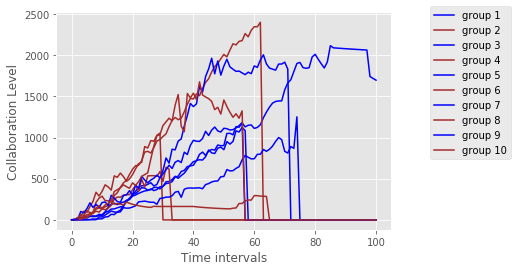

In [13]:
m1List = ['cls409','cls410', 'cls411',  'cls412']
m2List = ['cls413', 'cls414', 'cls415', 'cls416']
m3List = ['cls417','cls418', 'cls419', 'cls420']
m4List = ['cls421', 'cls422', 'cls423', 'cls424']
m5List = ['cls425','cls426', 'cls427',  'cls428']
m6List = ['cls429', 'cls430', 'cls431', 'cls432']
m7List = ['cls433','cls434', 'cls435', 'cls436']
m8List = ['cls437', 'cls438', 'cls438', 'cls440']
m9List = ['cls445','cls446', 'cls447', 'cls448']
m10List = ['cls457', 'cls458', 'cls459', 'cls460']


#m5List = ['cls401', 'cls402', 'cls403', 'cls404']

all4gMem = [m1List, m2List, m3List, m4List, m5List, m6List, m7List, m8List, m9List, m10List]
allGrps = [group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1, group10_1] 

grpList,timeList = plotGroupAtTimeIntevals(allGrps,all4gMem, 2)
#plotGroupAtTimeIntevals(allGrps,all4gMem, 1) 
       
plt.plot(timeList, grpList[0], color='#0000FF', label ='group 1')
plt.plot(timeList, grpList[1], color='#A52A2A', label ='group 2')
plt.plot(timeList, grpList[2], color='#0000FF', label='group 3')
plt.plot(timeList, grpList[3], color='#A52A2A', label='group 4')
plt.plot(timeList, grpList[4], color='#0000FF', label ='group 5')
plt.plot(timeList, grpList[5], color='#A52A2A', label ='group 6')
plt.plot(timeList, grpList[6], color='#0000FF', label='group 7')
plt.plot(timeList, grpList[7], color='#A52A2A', label='group 8')
plt.plot(timeList, grpList[8], color='#0000FF', label='group 9')
plt.plot(timeList, grpList[9], color='#A52A2A', label='group 10')

plt.xlabel('Time intervals')
plt.ylabel('Collaboration Level')


plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('C:/Users/User/Desktop/NewStudy/realTimeMeasure.jpg')
#plt.savefig('C:/Users/User/Desktop/Study3/StudyData1/realTimeMeasure.jpg')
plt.show()
